In [5]:
## Goals:
# Solves the 1D heat equation with an explicit finite difference scheme.
# Thermal cooling from a hot basaltic dike intrudes cooler country rocks.
# Following Chapter 4. Finite Differences in Numerical Modeling of Earth Systems USC GEOL557 v1.2.2.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
L        = 100 
Tmagma   = 1200
Trock    = 300
kappa    = 1e-6
W        = 5
day      = 3600*24
dt       = 1.*day

nx       = 201
nt       = 500
dx       = L/(nx-1)
x        = np.linspace(-L/2, L/2, nx)

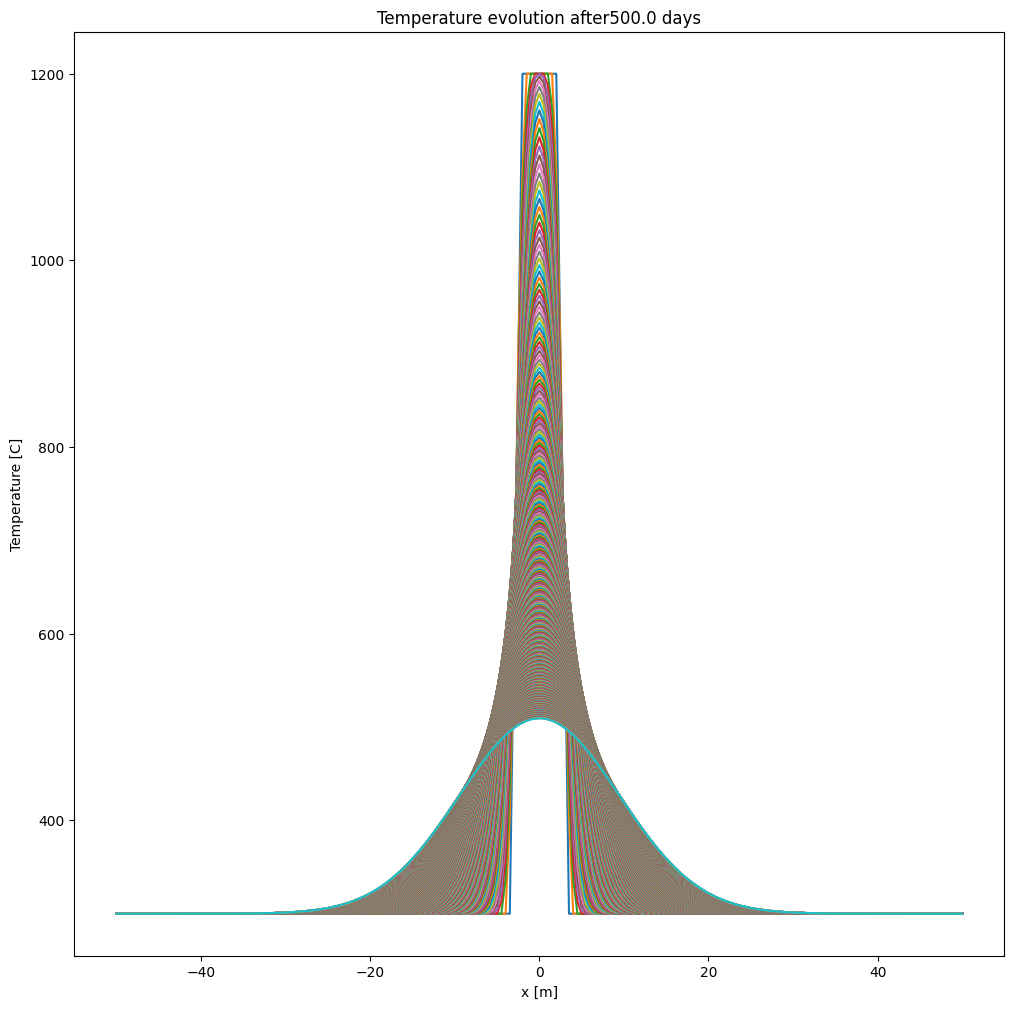

In [8]:
# setup initial temperature profile.
T        = np.ones(len(x))*Trock
for i, xcoor in enumerate(x):
    if abs(xcoor)<=W/2:
        T[i] = Tmagma

time     = 0
fig       = plt.figure(figsize=(12,12), dpi= 100, facecolor='w', edgecolor='k')
for it in range(nt): # Timestep loop
    
    # compute new temperature
    Tnew   = np.zeros((nx))
    for i in range(1,nx-1): # for non-bounary nodes 
        Tnew[i] = T[i] + kappa*dt*(T[i+1] - 2.*T[i] + T[i-1])/dx/dx
    
    # Set boundary conditions
    Tnew[0]     = T[0]
    Tnew[nx-1]  = T[nx-1]
    
    # Update temperature and time
    T           = Tnew
    time        = time + dt
    
    # Plot solution
    
    plt.plot(x, Tnew)
    plt.xlabel('x [m]')
    plt.ylabel('Temperature [C]')
    plt.title('Temperature evolution after' + str(time/day) + ' days')